#**CUSTOMER RELATIONSHIP MANAGEMENT**

#**PURPOSE**

The aim of this Customer Relationship Management (CRM) project is to establish a robust system for effectively managing and enhancing customer interactions. Utilizing the MySQL database schema provided, the project endeavors to centralize customer data management, streamline order processing, and analyze feedback. The primary objectives include storing and organizing comprehensive customer information, facilitating seamless communication channels, and ensuring efficient order tracking and inventory management. Additionally, the system aims to monitor customer feedback and ratings to identify areas for improvement, personalize marketing strategies, and ultimately foster stronger customer relationships. By implementing this CRM solution, businesses can optimize their customer interactions, drive satisfaction and loyalty, and ultimately achieve sustainable growth in a competitive market landscape.


**IMPORTING LIBRARIES**




In [ ]:
#install the required libraries
from mysql import connector
import pandas as pd

**DATABASE CONNECTION**

In [ ]:
connection =connector.connect(
host='127.0.0.1', #Host of mySql
user='root', #username
password='admin', #password
database='demo') #databasename

In [ ]:
pip install SQLAlchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


###**DATA VIEW**

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = 'root'
password = 'admin'
host = 'localhost'
database = 'demo'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Read the tables into DataFrames
customers = pd.read_sql('SELECT * FROM Customers', con=engine)
products = pd.read_sql('SELECT * FROM Products', con=engine)
employees = pd.read_sql('SELECT * FROM Employees', con=engine)


# Printing the first 5 records from each table
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nEmployees Data:")
print(employees.head())

Customers Data:
   CustomerID FirstName    LastName                       Email       Phone  \
0           1     Madan  Chatterjee  madan.chatterjee@gmail.com  8768510889   
1           2    Vihaan       Ghosh      vihaan.ghosh@gmail.com  7504916122   
2           3     Madan       Desai       madan.desai@gmail.com  8668243624   
3           4    Vihaan       Desai      vihaan.desai@gmail.com  8302837644   
4           5      Isha        Iyer         isha.iyer@gmail.com  7865910859   

                Address       City          State ZipCode Country  \
0    89, Chennai Street    Chennai     Tamil Nadu  056873   India   
1  67, Bangalore Street  Bangalore      Karnataka  482179   India   
2      1, Mumbai Street     Mumbai    Maharashtra  281975   India   
3    84, Lucknow Street    Lucknow  Uttar Pradesh  678123   India   
4     58, Jaipur Street     Jaipur      Rajasthan  840129   India   

            CreatedAt  
0 2024-06-05 21:44:37  
1 2024-06-05 21:44:37  
2 2024-06-05 21:44:37 

##**DATA CLEANING**

###**FINDING MISSING DATA**

In [ ]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Customers\n----------")
print(customers.isnull().sum())
print("\nProducts\n----------")
print(products.isnull().sum())
print("\nEmployees\n----------")
print(employees.isnull().sum())


Customers
----------
CustomerID    0
FirstName     0
LastName      0
Email         0
Phone         0
Address       0
City          0
State         0
ZipCode       0
Country       0
CreatedAt     0
dtype: int64

Products
----------
ProductID      0
ProductName    0
Description    0
Price          0
Stock          0
CreatedAt      0
dtype: int64

Employees
----------
EmployeeID    0
FirstName     0
LastName      0
Email         0
Phone         0
Position      0
Department    0
HireDate      0
CreatedAt     0
dtype: int64


#**EXPLORATORY DATA VISUALISATION AND ANALYSIS**

#**Distribution of Customers by State**

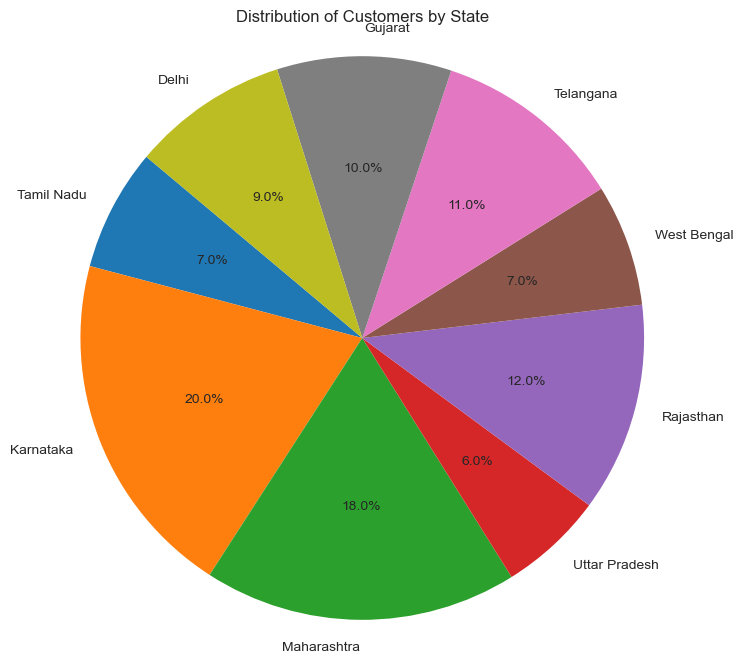

In [ ]:
# Same setup as above until the query

# Query data from database
query = "SELECT State, COUNT(*) AS CustomerCount FROM Customers GROUP BY State"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=result.keys())

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['CustomerCount'], labels=df['State'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers by State')
plt.axis('equal')
plt.show()


##**Top 10 Most Common Last Names**

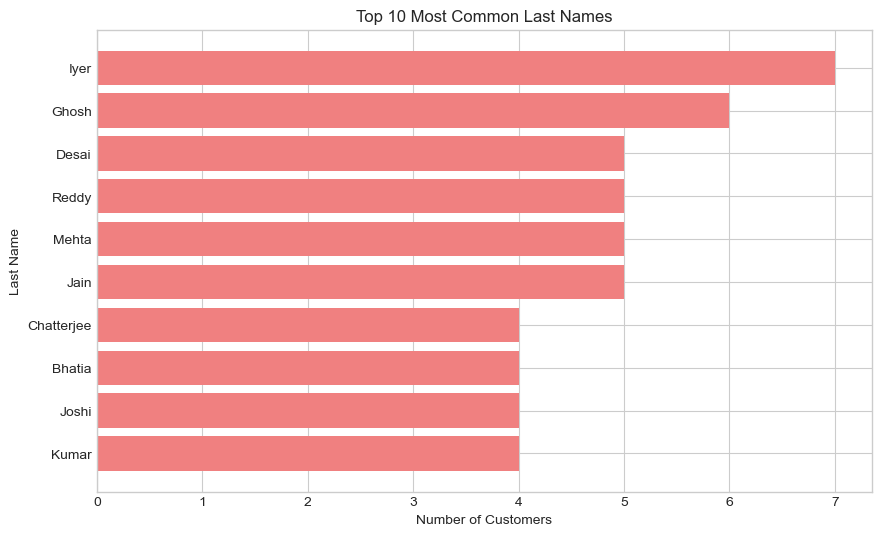

In [ ]:
# Same setup as above until the query

# Query data from database
query = "SELECT LastName, COUNT(*) AS LastNameCount FROM Customers GROUP BY LastName ORDER BY LastNameCount DESC LIMIT 10"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=result.keys())

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['LastName'], df['LastNameCount'], color='lightcoral')
plt.xlabel('Number of Customers')
plt.ylabel('Last Name')
plt.title('Top 10 Most Common Last Names')
plt.gca().invert_yaxis()
plt.show()


##**Histogram of Product Prices**

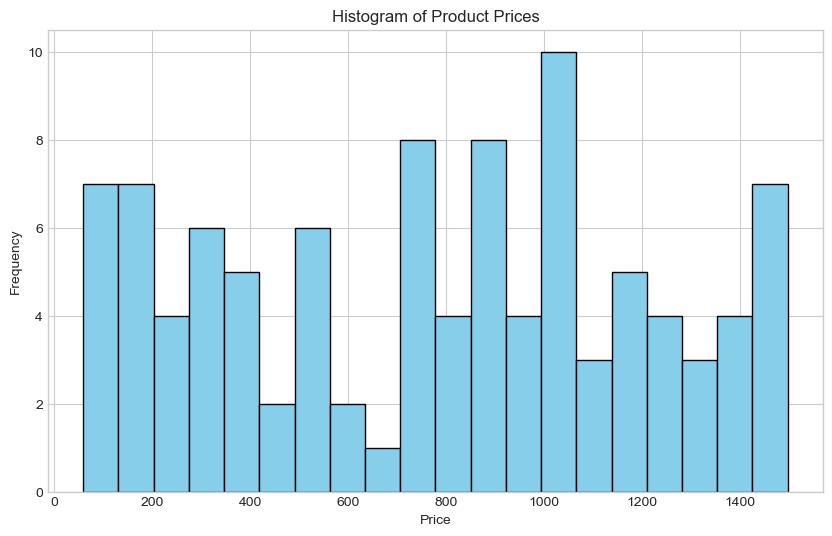

In [ ]:
query = "SELECT Price FROM Products"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=['Price'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Product Prices')
plt.grid(True)
plt.show()

##**Scatter Plot of Price vs. Stock**

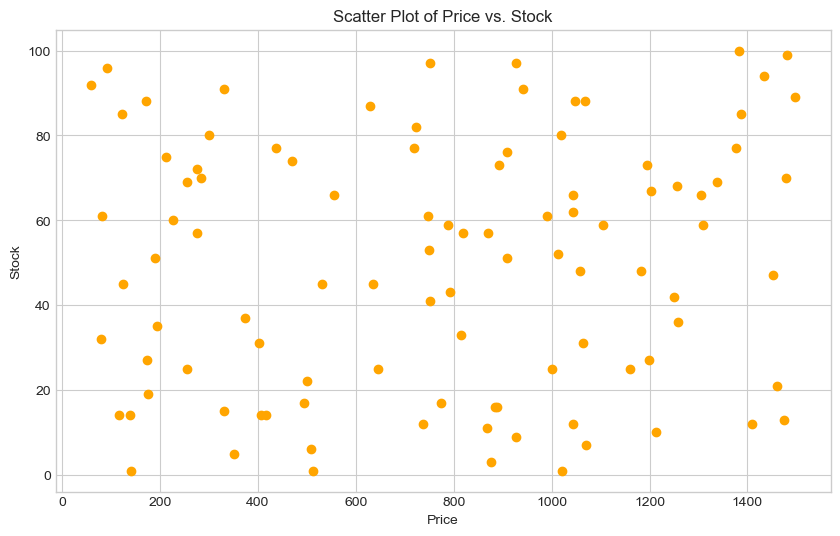

In [ ]:
# Query data from database
query = "SELECT Price, Stock FROM Products"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=['Price', 'Stock'])

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Stock'], color='orange')
plt.xlabel('Price')
plt.ylabel('Stock')
plt.title('Scatter Plot of Price vs. Stock')
plt.grid(True)
plt.show()


##**Number of Employees by Department**

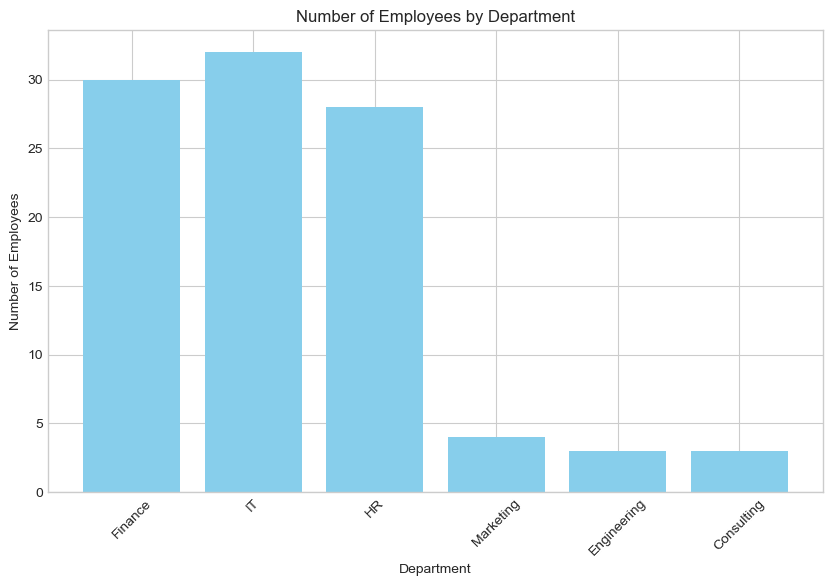

In [ ]:
query = "SELECT Department, COUNT(*) AS EmployeeCount FROM Employees GROUP BY Department"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=['Department', 'EmployeeCount'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Department'], df['EmployeeCount'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Department')
plt.xticks(rotation=45)
plt.show()

##**Employee Positions Distribution**

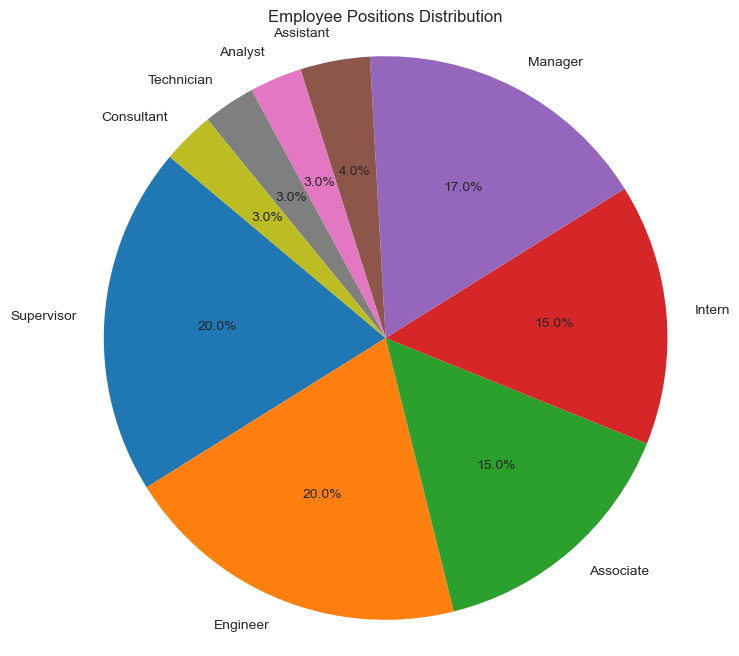

In [ ]:
# Query data from database
query = "SELECT Position, COUNT(*) AS EmployeeCount FROM Employees GROUP BY Position"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=['Position', 'EmployeeCount'])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['EmployeeCount'], labels=df['Position'], autopct='%1.1f%%', startangle=140)
plt.title('Employee Positions Distribution')
plt.axis('equal')
plt.show()


##**Histogram of Employee Ages**

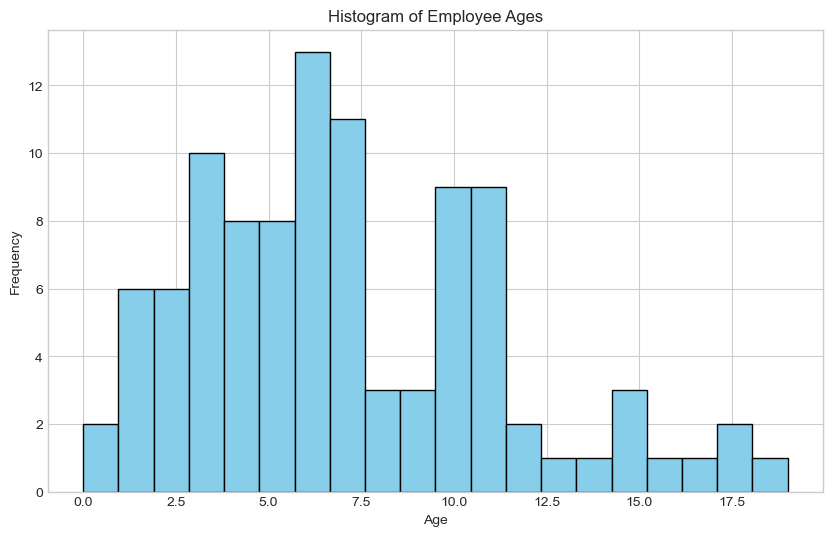

In [ ]:
# Query data from database
query = "SELECT TIMESTAMPDIFF(YEAR, HireDate, CURDATE()) AS Age FROM Employees"
result = engine.execute(query)

# Convert query result to pandas DataFrame
df = pd.DataFrame(result.fetchall(), columns=['Age'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Ages')
plt.grid(True)
plt.show()


##**CONCLUSION**

In conclusion, the Customer Relationship Management (CRM) project aims to revolutionize how businesses manage and enhance customer interactions. By leveraging the provided MySQL database schema, the project seeks to centralize customer data management, streamline order processing, and analyze feedback effectively.